In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
 
print('Numpy Version :', np.__version__)
print('Pandas Version :', pd.__version__)
print('Seaborn Version :', sns.__version__)

Numpy Version : 1.20.1
Pandas Version : 1.2.2
Seaborn Version : 0.11.0


In [2]:
rcParams['figure.figsize'] = (10,7)
rcParams['lines.linewidth'] = 2.5
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [3]:
df = pd.read_csv('Train.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
df.sample(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
4854,4855,D,Ship,2,5,284,3,medium,M,6,4575,0
9399,9400,B,Ship,5,4,226,6,low,M,1,1327,0
811,812,F,Road,4,1,182,3,medium,M,28,2005,1
9906,9907,D,Ship,6,2,173,3,medium,F,4,5970,0
6777,6778,B,Ship,5,1,249,3,medium,F,5,4392,0


In [5]:
df = df.drop(columns = 'ID')

In [6]:
df_disc_applied = df.copy()
df_disc_applied['Discount_offered'] = [1/100] * df['Discount_offered']
df_disc_applied['cashback'] = df['Cost_of_the_Product'] * df['Discount_offered']
df_disc_applied['cashback'] = [1/100] * df_disc_applied['cashback'] 
df_disc_applied['cost_after_discount'] = df['Cost_of_the_Product'] - df_disc_applied['cashback']

In [7]:
df_disc_applied.sample(5)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,cashback,cost_after_discount
2222,A,Ship,3,4,234,3,medium,F,0.37,2111,1,86.58,147.42
10546,C,Flight,4,4,209,3,medium,M,0.07,4717,1,14.63,194.37
4529,F,Flight,4,5,142,10,high,F,0.05,4147,1,7.10,134.90
5703,B,Ship,5,5,248,2,low,M,0.04,5587,0,9.92,238.08
10624,C,Ship,4,1,258,3,medium,M,0.10,5916,0,25.80,232.20


In [8]:
df_disc_applied.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      10999 non-null  object 
 1   Mode_of_Shipment     10999 non-null  object 
 2   Customer_care_calls  10999 non-null  int64  
 3   Customer_rating      10999 non-null  int64  
 4   Cost_of_the_Product  10999 non-null  int64  
 5   Prior_purchases      10999 non-null  int64  
 6   Product_importance   10999 non-null  object 
 7   Gender               10999 non-null  object 
 8   Discount_offered     10999 non-null  float64
 9   Weight_in_gms        10999 non-null  int64  
 10  Reached.on.Time_Y.N  10999 non-null  int64  
 11  cashback             10999 non-null  float64
 12  cost_after_discount  10999 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.1+ MB


In [9]:
nums = ['Customer_care_calls','Customer_rating','Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms','Reached.on.Time_Y.N', 'cashback','cost_after_discount']
cats = ['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']

In [10]:
# dua kolom baru diubah ke int64 agar bentuknya bukan lagi float
df_disc_applied['cashback'] = df_disc_applied['cashback'].apply(np.int64)
df_disc_applied['cost_after_discount'] = df_disc_applied['cost_after_discount'].apply(np.int64)

In [11]:
df_disc_applied.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      10999 non-null  object 
 1   Mode_of_Shipment     10999 non-null  object 
 2   Customer_care_calls  10999 non-null  int64  
 3   Customer_rating      10999 non-null  int64  
 4   Cost_of_the_Product  10999 non-null  int64  
 5   Prior_purchases      10999 non-null  int64  
 6   Product_importance   10999 non-null  object 
 7   Gender               10999 non-null  object 
 8   Discount_offered     10999 non-null  float64
 9   Weight_in_gms        10999 non-null  int64  
 10  Reached.on.Time_Y.N  10999 non-null  int64  
 11  cashback             10999 non-null  int64  
 12  cost_after_discount  10999 non-null  int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 1.1+ MB


In [12]:
df_disc_applied.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,cashback,cost_after_discount
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,0.133732,3634.016729,0.596691,26.547686,182.682426
std,1.141490,1.413603,48.063272,1.522860,0.162055,1635.377251,0.490584,33.001073,56.901337
min,2.000000,1.000000,96.000000,2.000000,0.010000,1001.000000,0.000000,0.000000,36.000000
25%,3.000000,2.000000,169.000000,3.000000,0.040000,1839.500000,0.000000,7.000000,140.000000
50%,4.000000,3.000000,214.000000,3.000000,0.070000,4149.000000,1.000000,14.000000,186.000000
75%,5.000000,4.000000,251.000000,4.000000,0.100000,5050.000000,1.000000,25.000000,231.000000
max,7.000000,5.000000,310.000000,10.000000,0.650000,7846.000000,1.000000,185.000000,306.000000


In [13]:
df_disc_applied[cats].describe()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


In [14]:
for i in cats:
  print(f'''Jumlah Kolom Sebanyak{i}:''')
  print(df_disc_applied[i].value_counts())
  print()

Jumlah Kolom SebanyakWarehouse_block:
F    3666
D    1834
C    1833
A    1833
B    1833
Name: Warehouse_block, dtype: int64

Jumlah Kolom SebanyakMode_of_Shipment:
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

Jumlah Kolom SebanyakProduct_importance:
low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64

Jumlah Kolom SebanyakGender:
F    5545
M    5454
Name: Gender, dtype: int64



# EDA

## Univariate Analysis

-NUMERICAL-

1. Boxplot

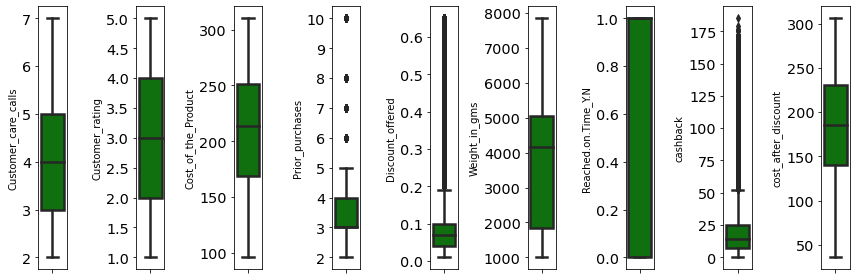

In [15]:
plt.figure(figsize=(12,4))
for i in range(0, len(nums)):
  plt.subplot(1, len(nums), i+1)
  sns.boxplot(y = df_disc_applied[nums[i]], color = 'green', orient='v')
  plt.tight_layout()

2. Distplot

C:\Users\fahrizan rasyad\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\fahrizan rasyad\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\fahrizan rasyad\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

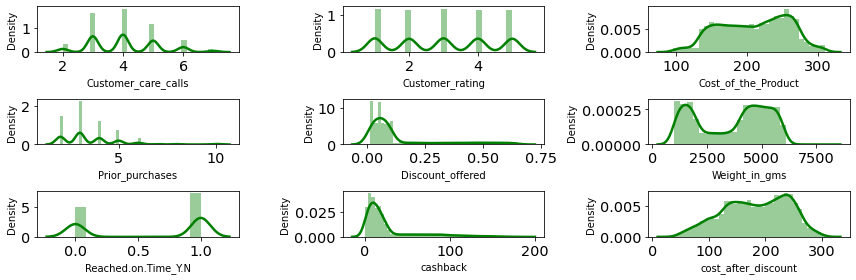

In [16]:
plt.figure(figsize=(12,4))
for i in range(0, len(nums)):
  plt.subplot(3, 3, i+1)
  sns.distplot(df_disc_applied[nums[i]], color = 'green')
  plt.tight_layout()

3. ViolinPlot

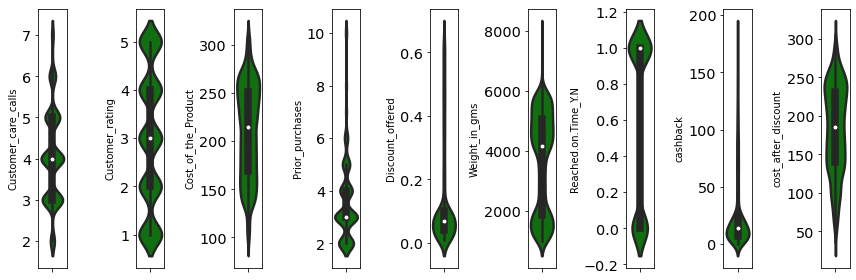

In [17]:
plt.figure(figsize=(12,4))
for i in range(0, len(nums)):
  plt.subplot(1, len(nums), i+1)
  sns.violinplot(y = df_disc_applied[nums[i]], color = 'green', orient = 'v')
  plt.tight_layout()

4. CountPlot

C:\Users\fahrizan rasyad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\fahrizan rasyad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\fahrizan rasyad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C

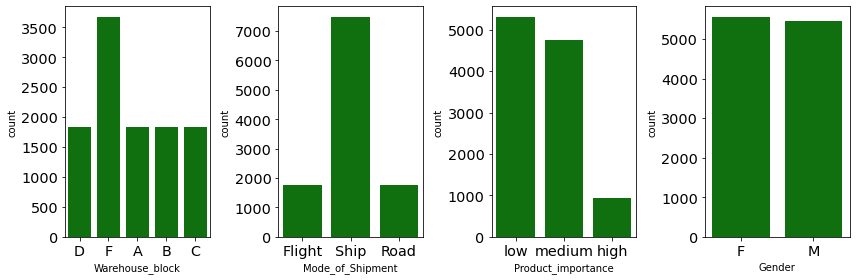

In [18]:
plt.figure(figsize=(12,4))
for i in range(0, len(cats)):
  plt.subplot(1, len(cats), i+1)
  sns.countplot(df_disc_applied[cats[i]], color = 'green', orient = 'v')
  plt.tight_layout()

## MULTIVARIATE ANALYSIS

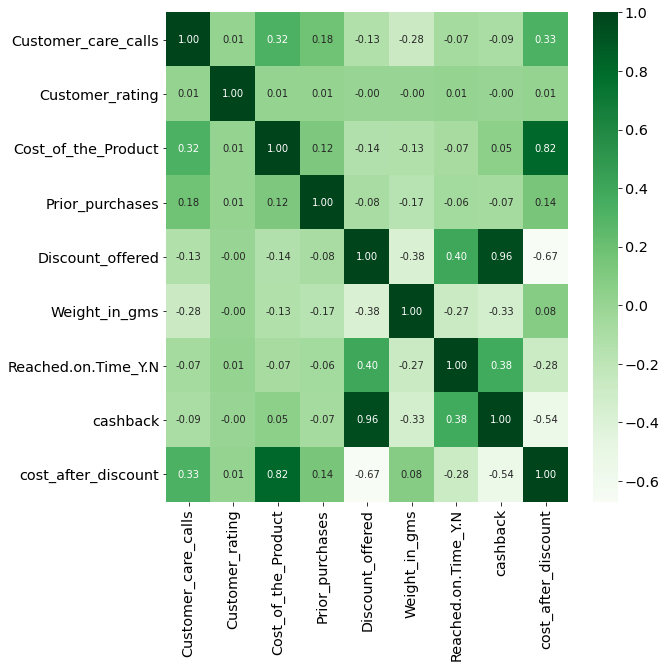

In [19]:
plt.figure(figsize=(9,9))
sns.heatmap(df_disc_applied.corr(), cmap='Greens',annot = True, fmt = '.2f')
plt.show()

- Target memiliki korelasi positif kepada 'discount_offered' dan korelas negatif terhadap 'weight_in_gms' korelasi kedua nya lebih dari 0.1 sehingga regresi linier bisa dilakukan.
- tidak ada korelasi yang sangat kuat antar feature (>0.7) sehingga tidak ada feature yang redundan pada kasus ini.
- Terdapat korelasi positif antara feature "Cost_of_the_product" terhadap feature "Customer_care_calls" sebesar 0.32
- Terdapat korelasi negatif antara feature 'Weight_in_gms' terhadap feature 'Discount_offered' sebesar -0.38
- Terdapat korelasi positif antar feature 'Customer_care_calls' terhadap feature 'Cost_of_the_product' sebesar 0.32 dan korelasi negatif antara feature 'Customer_care_calls' terhadap feature 'Weight_in_gms' sebesar -0.28 

<Figure size 720x720 with 0 Axes>

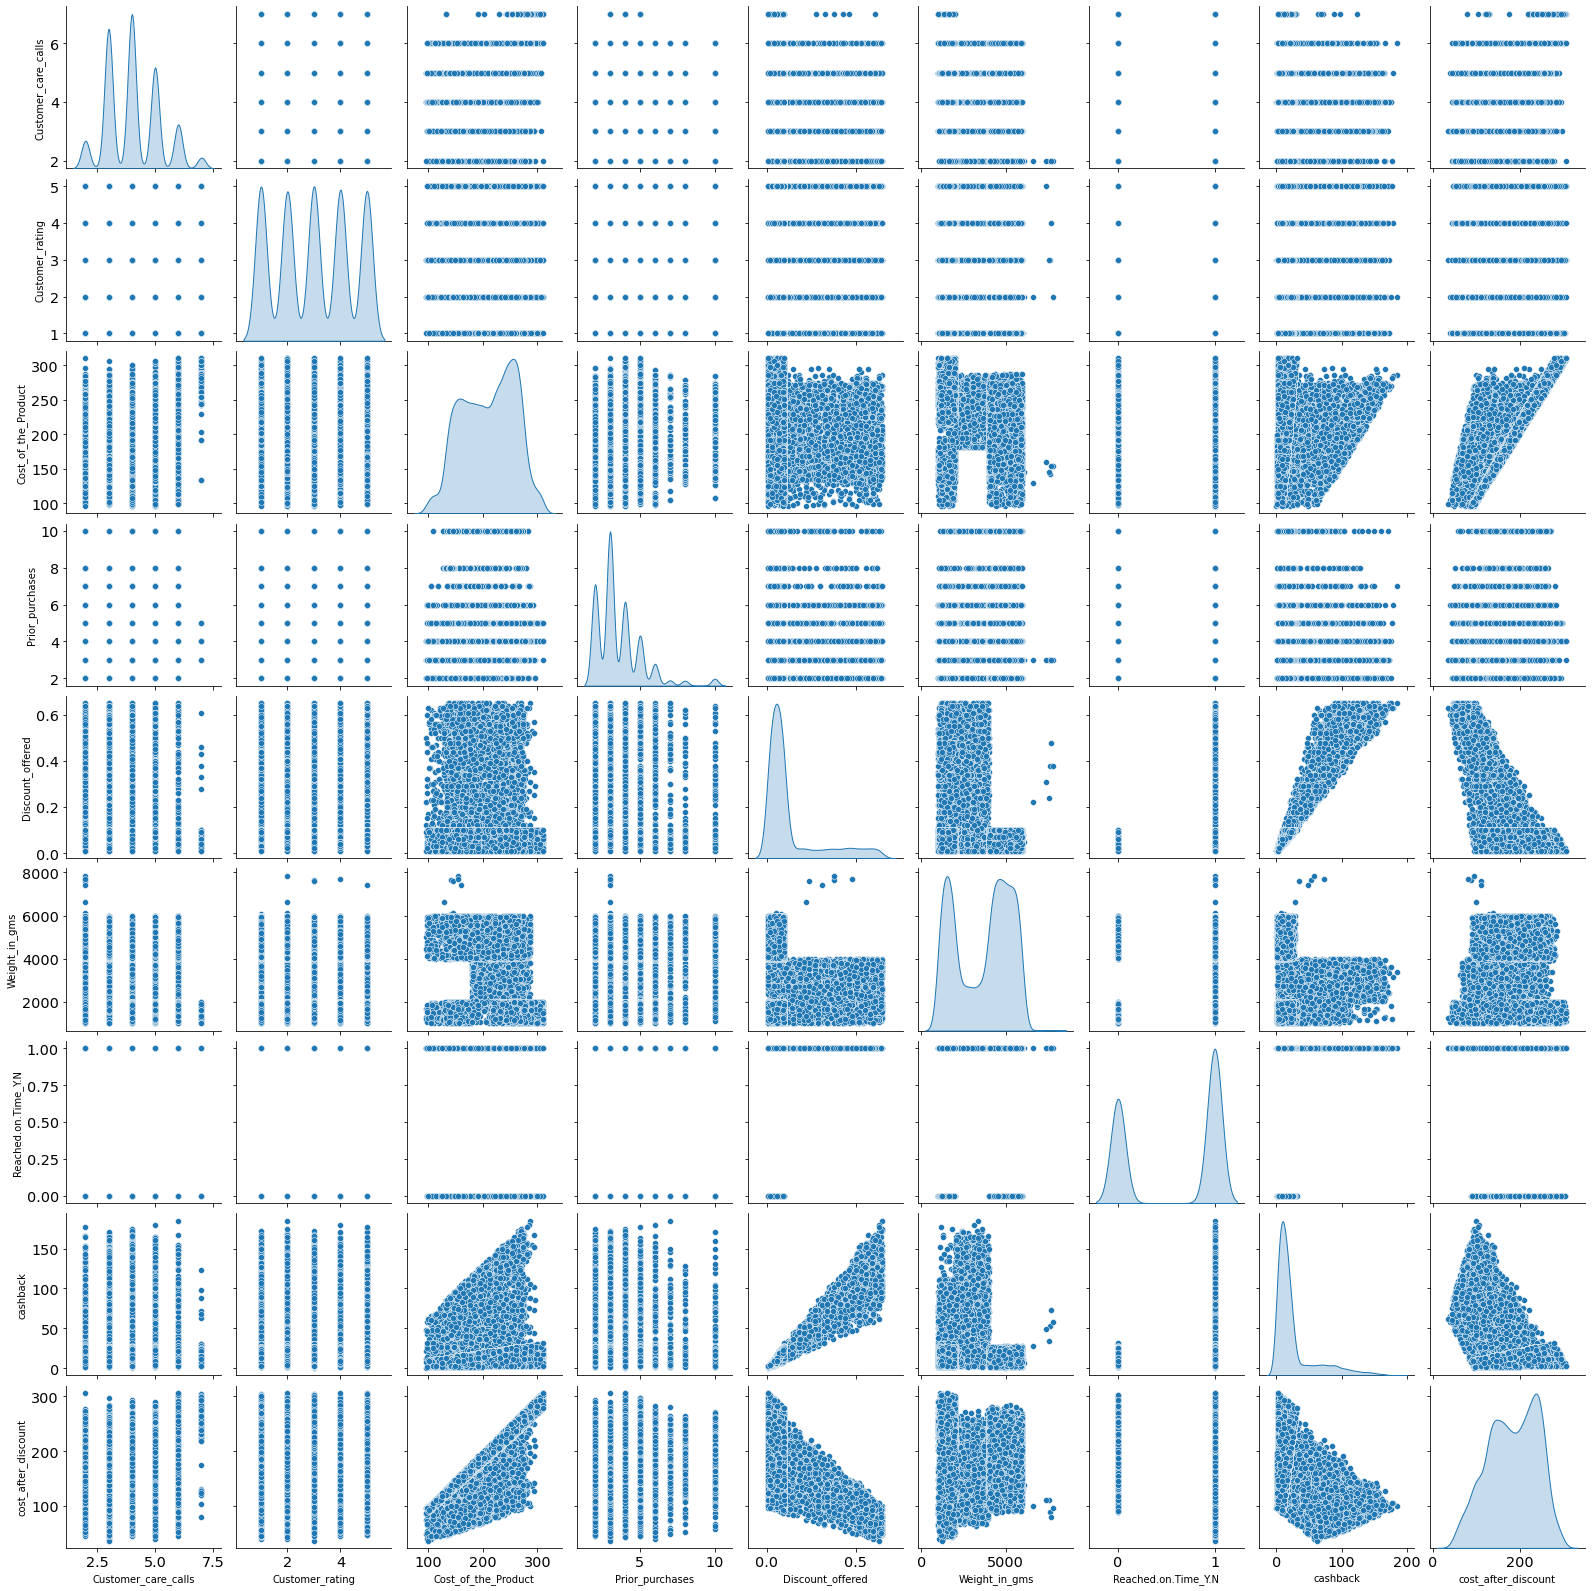

In [20]:
plt.figure(figsize=(10,10))

sns.pairplot(df_disc_applied, diag_kind='kde')

<Figure size 720x720 with 0 Axes>

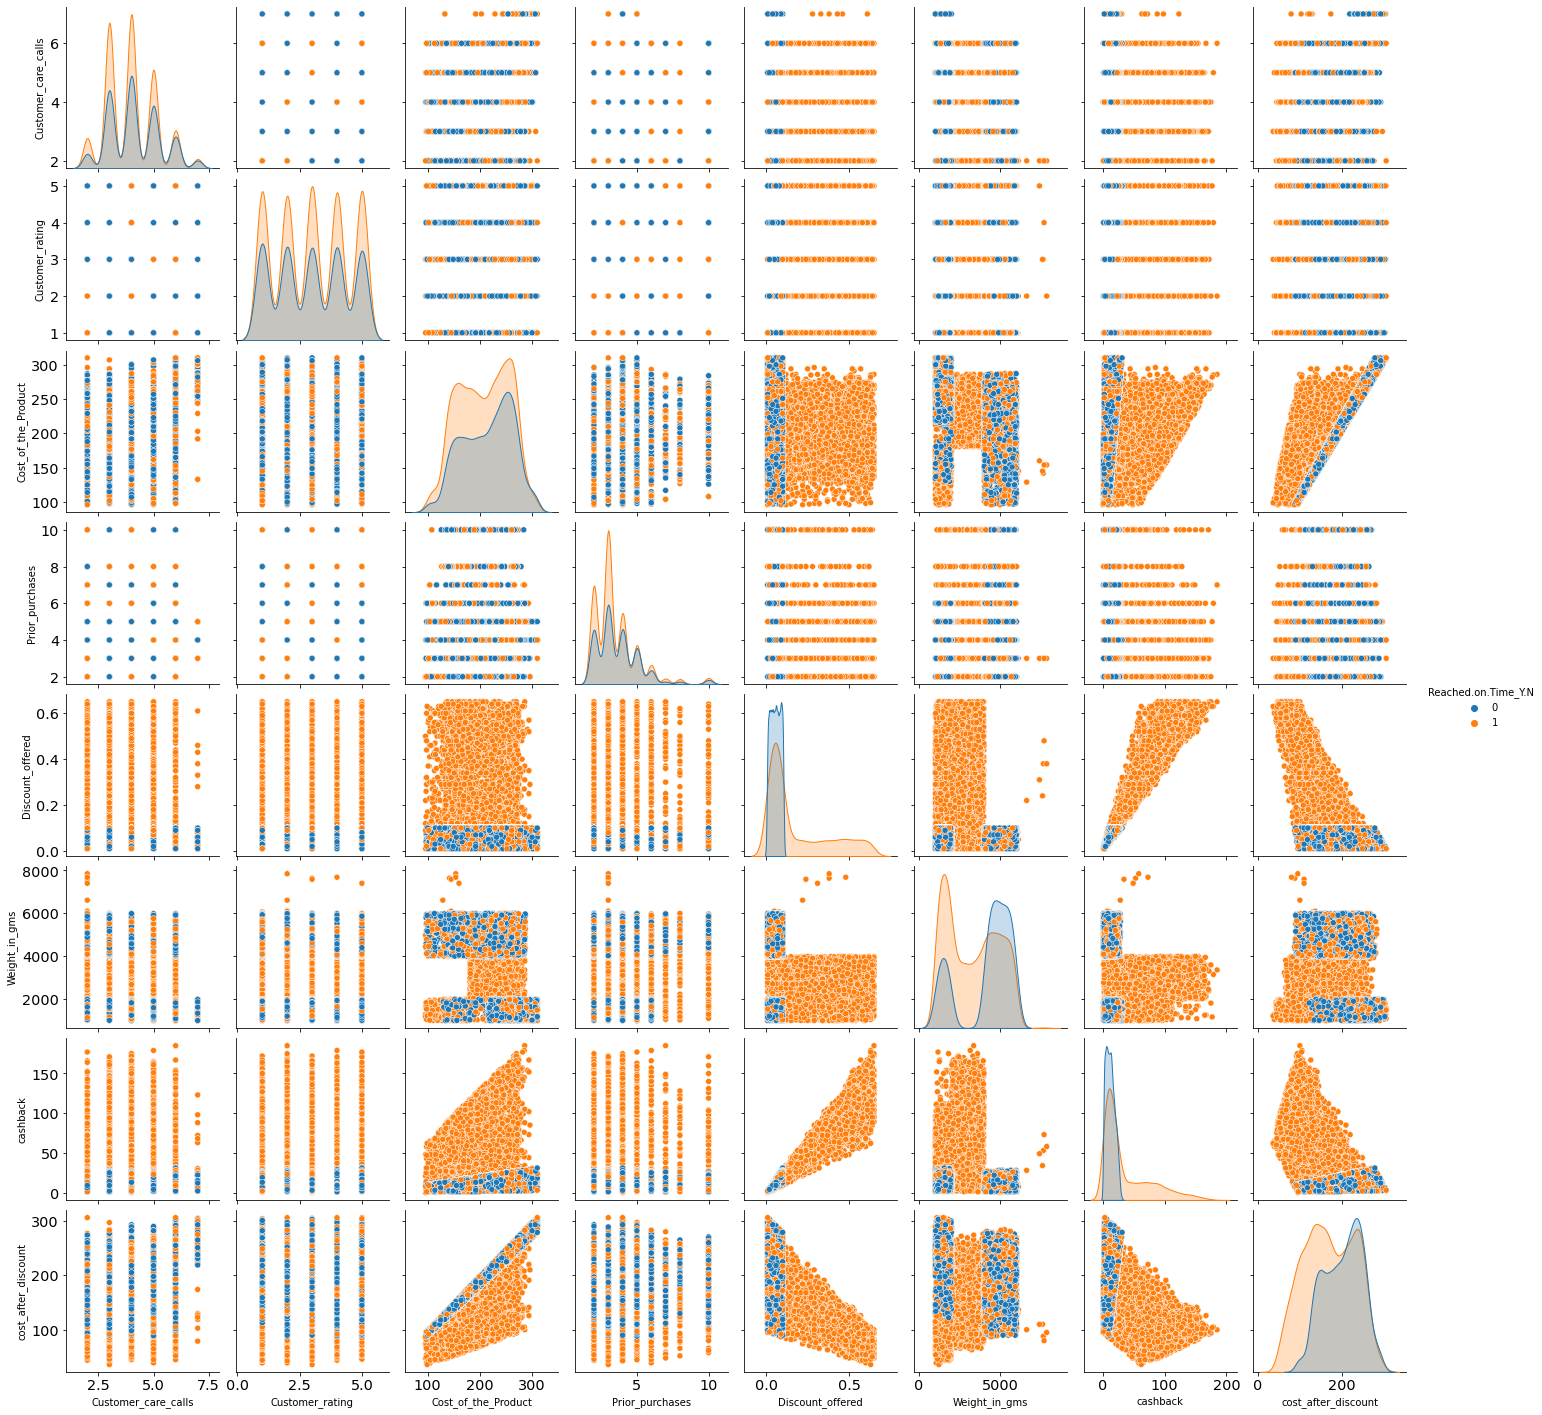

In [21]:
plt.figure(figsize=(10,10))
sns.pairplot(df_disc_applied, diag_kind='kde', hue='Reached.on.Time_Y.N')


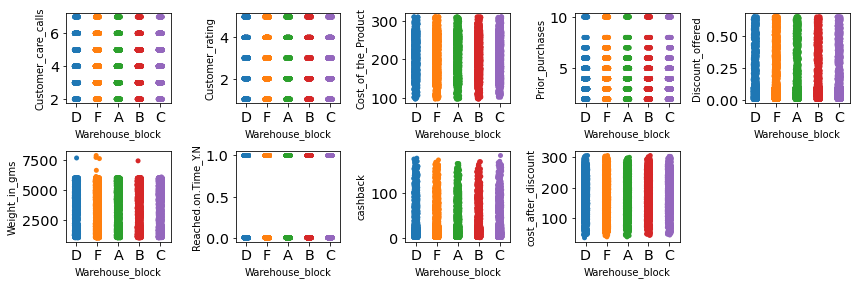

In [22]:
fig = plt.figure(figsize=(12,4))
for i in range(0, len(nums)):
  ax = fig.add_subplot(2,5, i+1)
  sns.stripplot(ax = ax, data = df_disc_applied, x ='Warehouse_block', y = nums[i])
  plt.tight_layout()

  if i !=0: plt.close(i+1)
  plt.close(len(nums)+1)

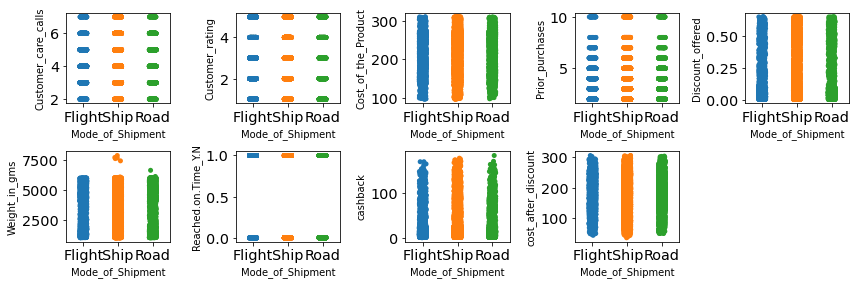

In [23]:
fig = plt.figure(figsize=(12,4))
for i in range (0, len(nums)):
  ax= fig.add_subplot(2,5 , i+1)
  sns.stripplot(ax = ax, data = df_disc_applied, x='Mode_of_Shipment', y = nums[i])
  plt.tight_layout()

  if i !=0 : plt.close(i+1)
  plt.close(len(nums)+1)

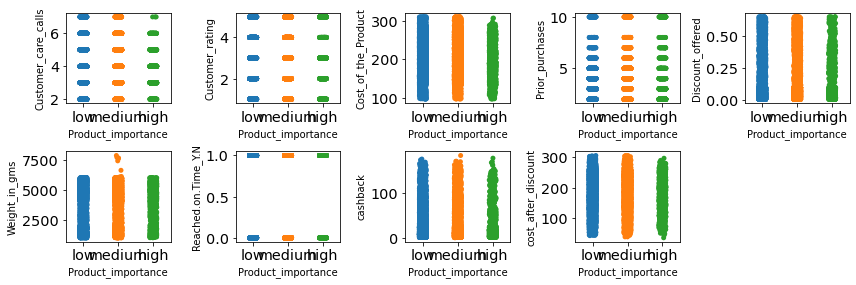

In [24]:
fig = plt.figure(figsize=(12,4))
for i in range (0, len(nums)):
  ax = fig.add_subplot(2,5,i+1)
  sns.stripplot( ax=ax, data=df_disc_applied, x='Product_importance', y =nums[i])
  plt.tight_layout()

  if i !=0: plt.close(i+1)
  plt.close(len(nums)+1)

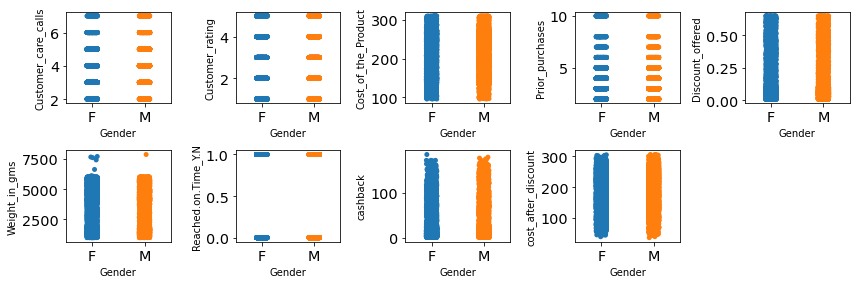

In [25]:
fig = plt.figure(figsize=(12,4))
for i in range(0, len(nums)):
  ax = fig.add_subplot(2,5,i+1)
  sns.stripplot(ax=ax, data=df_disc_applied, x= 'Gender', y= nums[i])
  plt.tight_layout()

  if i !=0 : plt.close(i+1)
  plt.close(len(nums)+1)


# Conclusion EDA

- Target memiliki korelasi positif kepada 'discount_offered' dan korelas negatif terhadap 'weight_in_gms' korelasi kedua nya lebih dari 0.1 sehingga regresi linier bisa dilakukan.
- tidak ada korelasi yang sangat kuat antar feature (>0.7) sehingga tidak ada feature yang redundan pada kasus ini.
- Terdapat korelasi positif antara feature "Cost_of_the_product" terhadap feature "Customer_care_calls" sebesar 0.32
- Terdapat korelasi negatif antara feature 'Weight_in_gms' terhadap feature 'Discount_offered' sebesar -0.38
- Terdapat korelasi positif antar feature 'Customer_care_calls' terhadap feature 'Cost_of_the_product' sebesar 0.32 dan korelasi negatif antara feature 'Customer_care_calls' terhadap feature 'Weight_in_gms' sebesar -0.28 
- Berdasarkan stripplot yang ditampilkan terlihat bahwa, untuk feature kategorikal tidak terlalu memiliki pengaruh terhadap feature numerikal, yang berarti feature kategorikal bisa diabaikan
- berdasarkan pairplot dengan hue = 'Reached.on.Time_Y.N' terlihat bahwa banyak feature-feature yang memiliki warna terpisah dengan sempurna, sehingga feature pada data set ini dapat dikatakan baik untuk dapat menggambarkan target nya.
- telah dilakukan feature engineer dengan menambahkan 2 feature yaitu 'cashback' dan 'cost_after_discount' dari kedua feature baru tersebut diketahui memiliki korelasi yang cukup mempengaruhi target yaitu sebesar 0.38 untuk 'cashback' dan -0.28 untuk 'cost_after_discount'

# Visualisasi

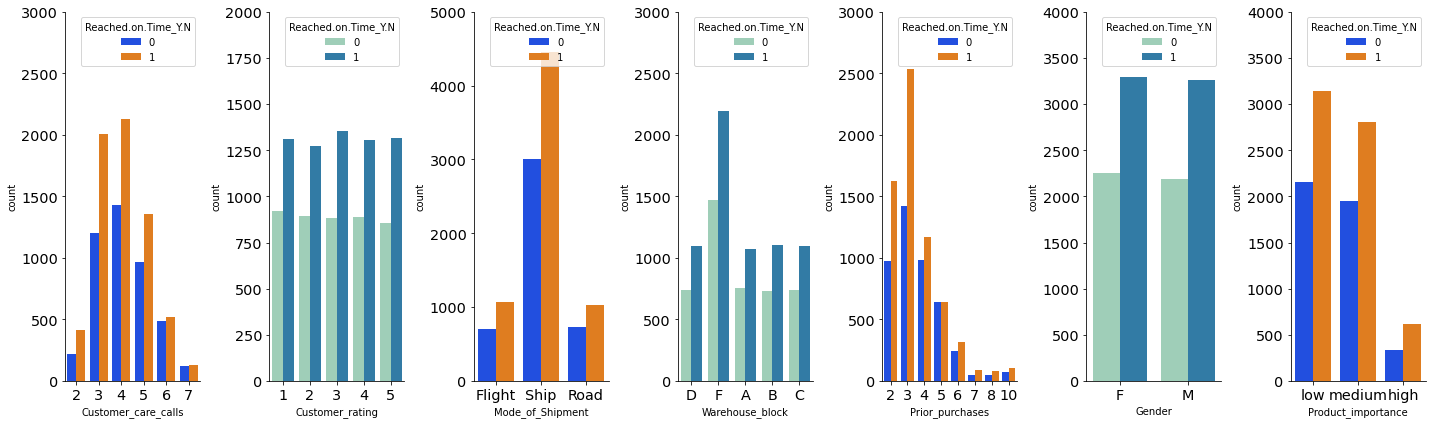

In [26]:
plt.figure(figsize=(20,6))
plt.subplot(1,7,1)
sns.countplot(x='Customer_care_calls' , data=df_disc_applied, hue='Reached.on.Time_Y.N', palette='bright')
sns.despine()
plt.ylim(0, 3000)

plt.subplot(1,7,2)
sns.countplot(x='Customer_rating' , data=df_disc_applied, hue='Reached.on.Time_Y.N', palette='YlGnBu')
sns.despine()
plt.ylim(0, 2000)

plt.subplot(1,7,3)
sns.countplot(x='Mode_of_Shipment' , data=df_disc_applied, hue='Reached.on.Time_Y.N', palette='bright')
sns.despine()
plt.ylim(0, 5000)

plt.subplot(1,7,4)
sns.countplot(x='Warehouse_block' , data=df_disc_applied, hue='Reached.on.Time_Y.N', palette='YlGnBu')
sns.despine()
plt.ylim(0, 3000)

plt.subplot(1,7,5)
sns.countplot(x='Prior_purchases' , data=df_disc_applied, hue='Reached.on.Time_Y.N', palette='bright')
sns.despine()
plt.ylim(0, 3000)

plt.subplot(1,7,6)
sns.countplot(x='Gender' , data=df_disc_applied, hue='Reached.on.Time_Y.N', palette='YlGnBu')
sns.despine()
plt.ylim(0, 4000)

plt.subplot(1,7,7)
sns.countplot(x='Product_importance' , data=df_disc_applied, hue='Reached.on.Time_Y.N', palette='bright')
sns.despine()
plt.ylim(0, 4000)

plt.tight_layout()
plt.show()

In [27]:
df_disc_applied.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,cashback,cost_after_discount
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,0.133732,3634.016729,0.596691,26.547686,182.682426
std,1.141490,1.413603,48.063272,1.522860,0.162055,1635.377251,0.490584,33.001073,56.901337
min,2.000000,1.000000,96.000000,2.000000,0.010000,1001.000000,0.000000,0.000000,36.000000
25%,3.000000,2.000000,169.000000,3.000000,0.040000,1839.500000,0.000000,7.000000,140.000000
50%,4.000000,3.000000,214.000000,3.000000,0.070000,4149.000000,1.000000,14.000000,186.000000
75%,5.000000,4.000000,251.000000,4.000000,0.100000,5050.000000,1.000000,25.000000,231.000000
max,7.000000,5.000000,310.000000,10.000000,0.650000,7846.000000,1.000000,185.000000,306.000000


# Data Preparation

### Missing Data

In [28]:
df_disc_applied.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      10999 non-null  object 
 1   Mode_of_Shipment     10999 non-null  object 
 2   Customer_care_calls  10999 non-null  int64  
 3   Customer_rating      10999 non-null  int64  
 4   Cost_of_the_Product  10999 non-null  int64  
 5   Prior_purchases      10999 non-null  int64  
 6   Product_importance   10999 non-null  object 
 7   Gender               10999 non-null  object 
 8   Discount_offered     10999 non-null  float64
 9   Weight_in_gms        10999 non-null  int64  
 10  Reached.on.Time_Y.N  10999 non-null  int64  
 11  cashback             10999 non-null  int64  
 12  cost_after_discount  10999 non-null  int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 1.1+ MB


Berdasarkan info di atas semua feature memiliki data yang lengkap atau tidak ada yang missing

In [29]:
cats = ['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']
nums = ['Customer_care_calls','Customer_rating','Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms','Reached.on.Time_Y.N','cashback','cost_after_discount']

In [30]:
df_disc_applied.isna().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
cashback               0
cost_after_discount    0
dtype: int64

Berdasarkan output di atas tidak ada feature yang memiliki data null

### Duplicated Data

In [42]:
print(df_disc_applied.duplicated().sum()) #1
print(df_disc_applied.duplicated(subset=['Warehouse_block','Mode_of_Shipment']).sum()) #2
print(df_disc_applied.duplicated(subset=['Warehouse_block','Mode_of_Shipment', 'Customer_care_calls']).sum()) #3
print(df_disc_applied.duplicated(subset=['Warehouse_block','Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating']).sum()) #4
print(df_disc_applied.duplicated(subset=['Warehouse_block','Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product']).sum()) #5
print(df_disc_applied.duplicated(subset=['Warehouse_block','Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Weight_in_gms']).sum()) #6
print(df_disc_applied.duplicated(subset=['Warehouse_block','Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Weight_in_gms','Reached.on.Time_Y.N']).sum()) #7
print(df_disc_applied.duplicated(subset=['Customer_care_calls','Customer_rating','Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms','Reached.on.Time_Y.N','cashback','cost_after_discount']).sum())

0
10984
10909
10567
1846
1
1
0


In [32]:
df_disc_applied.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      10999 non-null  object 
 1   Mode_of_Shipment     10999 non-null  object 
 2   Customer_care_calls  10999 non-null  int64  
 3   Customer_rating      10999 non-null  int64  
 4   Cost_of_the_Product  10999 non-null  int64  
 5   Prior_purchases      10999 non-null  int64  
 6   Product_importance   10999 non-null  object 
 7   Gender               10999 non-null  object 
 8   Discount_offered     10999 non-null  float64
 9   Weight_in_gms        10999 non-null  int64  
 10  Reached.on.Time_Y.N  10999 non-null  int64  
 11  cashback             10999 non-null  int64  
 12  cost_after_discount  10999 non-null  int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 1.1+ MB


### Outliers

In [33]:
len(df_disc_applied)

10999

Jumlah data adalah 10,999 baris

In [34]:
from scipy import stats

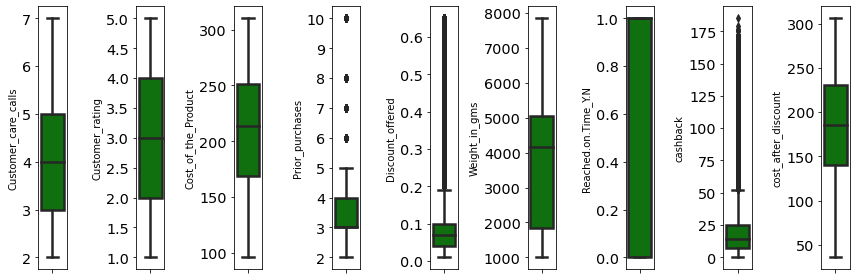

In [35]:
plt.figure(figsize=(12,4))
for i in range(0, len(nums)):
  plt.subplot(1, len(nums), i+1)
  sns.boxplot(y = df_disc_applied[nums[i]], color = 'green', orient = 'v')
  plt.tight_layout()

In [36]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_disc_applied)}')
filter = np.array([True] * len(df_disc_applied))
for col in ['Cost_of_the_Product','Weight_in_gms','cashback']:
    Q1 = df_disc_applied[col].quantile(0.25)
    Q3 = df_disc_applied[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)
    filter = ((df_disc_applied[col] >= low_limit) & (df_disc_applied[col] <= high_limit)) & filter
    
df_filtered = df_disc_applied[filter]
print(f'Jumlah baris setelah memfilter outlier: {len(df_filtered)}')

Jumlah baris sebelum memfilter outlier: 10999
Jumlah baris setelah memfilter outlier: 9214


In [37]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9214 entries, 3 to 10998
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      9214 non-null   object 
 1   Mode_of_Shipment     9214 non-null   object 
 2   Customer_care_calls  9214 non-null   int64  
 3   Customer_rating      9214 non-null   int64  
 4   Cost_of_the_Product  9214 non-null   int64  
 5   Prior_purchases      9214 non-null   int64  
 6   Product_importance   9214 non-null   object 
 7   Gender               9214 non-null   object 
 8   Discount_offered     9214 non-null   float64
 9   Weight_in_gms        9214 non-null   int64  
 10  Reached.on.Time_Y.N  9214 non-null   int64  
 11  cashback             9214 non-null   int64  
 12  cost_after_discount  9214 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 1007.8+ KB


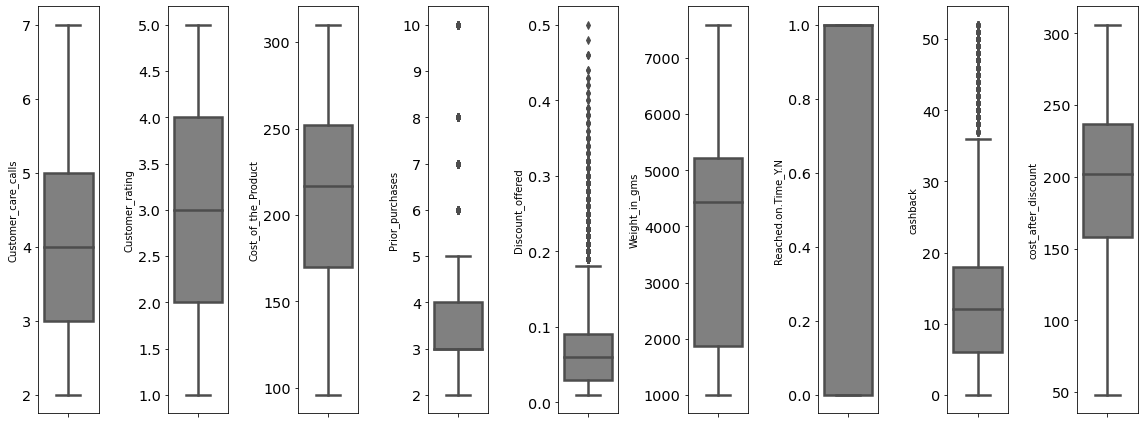

In [38]:
plt.figure(figsize=(16,6))
for i in range (0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df_filtered[nums[i]], color='grey', orient = 'v')
    plt.tight_layout()

### Normalization

In [39]:
df_filtered.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,cashback,cost_after_discount
count,9214.000000,9214.000000,9214.000000,9214.000000,9214.000000,9214.000000,9214.000000,9214.000000,9214.000000
mean,4.111027,2.993597,211.418602,3.622205,0.069131,3859.365422,0.518559,13.564142,196.884524
std,1.159364,1.411702,48.681230,1.520578,0.056293,1648.827257,0.499683,10.055245,48.488206
min,2.000000,1.000000,96.000000,2.000000,0.010000,1001.000000,0.000000,0.000000,48.000000
25%,3.000000,2.000000,170.000000,3.000000,0.030000,1874.250000,0.000000,6.000000,158.000000
50%,4.000000,3.000000,217.000000,3.000000,0.060000,4437.000000,1.000000,12.000000,202.000000
75%,5.000000,4.000000,252.000000,4.000000,0.090000,5210.000000,1.000000,18.000000,237.000000
max,7.000000,5.000000,310.000000,10.000000,0.500000,7588.000000,1.000000,52.000000,306.000000


In [56]:
nums2 =['Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product_norm',
 'Prior_purchases_std',
 'Discount_offered_std',
 'Weight_in_gms_std',
 'cashback_std',
 'cost_after_discount_std']

C:\Users\fahrizan rasyad\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\fahrizan rasyad\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\fahrizan rasyad\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

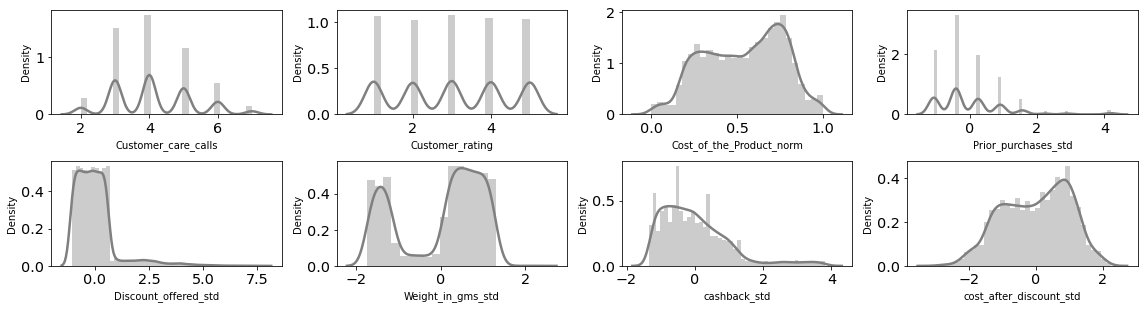

In [57]:
plt.figure(figsize=(16,6))
for i in range (0, len(nums2)):
    plt.subplot(3, 4, i+1)
    sns.distplot(df_filtered[nums2[i]], color='grey')
    plt.tight_layout()

In [43]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [44]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df_filtered['Cost_of_the_Product_norm'] = MinMaxScaler().fit_transform(df_filtered['Cost_of_the_Product'].values.reshape(len(df_filtered), 1))
df_filtered['Weight_in_gms_norm'] = MinMaxScaler().fit_transform(df_filtered['Weight_in_gms'].values.reshape(len(df_filtered), 1))
df_filtered['cashback_norm'] = MinMaxScaler().fit_transform(df_filtered['cashback'].values.reshape(len(df_filtered), 1))
df_filtered['cost_after_discount_norm'] = MinMaxScaler().fit_transform(df_filtered['cost_after_discount'].values.reshape(len(df_filtered), 1))

<ipython-input-44-082973f7e503>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Cost_of_the_Product_norm'] = MinMaxScaler().fit_transform(df_filtered['Cost_of_the_Product'].values.reshape(len(df_filtered), 1))
<ipython-input-44-082973f7e503>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Weight_in_gms_norm'] = MinMaxScaler().fit_transform(df_filtered['Weight_in_gms'].values.reshape(len(df_filtered), 1))
<ipython-input-44-082973f7e503>:4: SettingWithCopyWarning: 
A value is tryin

In [45]:
df_filtered['Cost_of_the_Product_std'] = StandardScaler().fit_transform(df_filtered['Cost_of_the_Product_norm'].values.reshape(len(df_filtered), 1))
df_filtered['Weight_in_gms_std'] = StandardScaler().fit_transform(df_filtered['Weight_in_gms_norm'].values.reshape(len(df_filtered), 1))
df_filtered['cashback_std'] = StandardScaler().fit_transform(df_filtered['cashback_norm'].values.reshape(len(df_filtered), 1))
df_filtered['cost_after_discount_std'] = StandardScaler().fit_transform(df_filtered['cost_after_discount_norm'].values.reshape(len(df_filtered), 1))
df_filtered['Prior_purchases_std'] = StandardScaler().fit_transform(df_filtered['Prior_purchases'].values.reshape(len(df_filtered), 1))
df_filtered['Discount_offered_std'] = StandardScaler().fit_transform(df_filtered['Discount_offered'].values.reshape(len(df_filtered), 1))

<ipython-input-45-635e0c2fa680>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Cost_of_the_Product_std'] = StandardScaler().fit_transform(df_filtered['Cost_of_the_Product_norm'].values.reshape(len(df_filtered), 1))
<ipython-input-45-635e0c2fa680>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Weight_in_gms_std'] = StandardScaler().fit_transform(df_filtered['Weight_in_gms_norm'].values.reshape(len(df_filtered), 1))
<ipython-input-45-635e0c2fa680>:3: SettingWithCopyWarning: 
A va

In [48]:
df_filtered.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,cashback,cost_after_discount,Cost_of_the_Product_norm,Weight_in_gms_norm,cashback_norm,cost_after_discount_norm,Cost_of_the_Product_std,Weight_in_gms_std,cashback_std,cost_after_discount_std,Prior_purchases_std,Discount_offered_std
count,9214.000000,9214.000000,9214.000000,9214.000000,9214.000000,9214.000000,9214.000000,9214.000000,9214.000000,9214.000000,9214.000000,9214.000000,9214.000000,9.214000e+03,9.214000e+03,9.214000e+03,9.214000e+03,9.214000e+03,9.214000e+03
mean,4.111027,2.993597,211.418602,3.622205,0.069131,3859.365422,0.518559,13.564142,196.884524,0.539339,0.433940,0.260849,0.577072,-1.188062e-15,-3.091852e-17,7.675468e-16,1.039686e-15,3.689847e-15,-2.127094e-16
std,1.159364,1.411702,48.681230,1.520578,0.056293,1648.827257,0.499683,10.055245,48.488206,0.227482,0.250315,0.193370,0.187939,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00
min,2.000000,1.000000,96.000000,2.000000,0.010000,1001.000000,0.000000,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,-2.371034e+00,-1.733669e+00,-1.349035e+00,-3.070697e+00,-1.066893e+00,-1.050458e+00
25%,3.000000,2.000000,170.000000,3.000000,0.030000,1874.250000,0.000000,6.000000,158.000000,0.345794,0.132572,0.115385,0.426357,-8.508587e-01,-1.204021e+00,-7.522991e-01,-8.019813e-01,-4.092123e-01,-6.951574e-01
50%,4.000000,3.000000,217.000000,3.000000,0.060000,4437.000000,1.000000,12.000000,202.000000,0.565421,0.521634,0.230769,0.596899,1.146582e-01,3.503496e-01,-1.555632e-01,1.055051e-01,-4.092123e-01,-1.622066e-01
75%,5.000000,4.000000,252.000000,4.000000,0.090000,5210.000000,1.000000,18.000000,237.000000,0.728972,0.638986,0.346154,0.732558,8.336601e-01,8.191931e-01,4.411727e-01,8.273693e-01,2.484682e-01,3.707442e-01
max,7.000000,5.000000,310.000000,10.000000,0.500000,7588.000000,1.000000,52.000000,306.000000,1.000000,1.000000,1.000000,1.000000,2.025149e+00,2.261509e+00,3.822676e+00,2.250473e+00,4.194551e+00,7.654405e+00


In [46]:
df_norm_std = df_filtered.drop(columns = ['Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms','cashback','cost_after_discount'])

In [47]:
df_norm_std.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9214 entries, 3 to 10998
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Warehouse_block           9214 non-null   object 
 1   Mode_of_Shipment          9214 non-null   object 
 2   Customer_care_calls       9214 non-null   int64  
 3   Customer_rating           9214 non-null   int64  
 4   Product_importance        9214 non-null   object 
 5   Gender                    9214 non-null   object 
 6   Reached.on.Time_Y.N       9214 non-null   int64  
 7   Cost_of_the_Product_norm  9214 non-null   float64
 8   Weight_in_gms_norm        9214 non-null   float64
 9   cashback_norm             9214 non-null   float64
 10  cost_after_discount_norm  9214 non-null   float64
 11  Cost_of_the_Product_std   9214 non-null   float64
 12  Weight_in_gms_std         9214 non-null   float64
 13  cashback_std              9214 non-null   float64
 14  cost_af

### Feature encoding

In [49]:
cats

['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

In [50]:
for i in cats:
    onehots= pd.get_dummies(df_filtered[cats], prefix = 'cat')
    df_final = df_filtered.join(onehots)

In [51]:
df_final = df_final.drop(columns=cats).copy()

In [52]:
df_final.sample(5)

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,cashback,cost_after_discount,Cost_of_the_Product_norm,...,cat_D,cat_F,cat_Flight,cat_Road,cat_Ship,cat_high,cat_low,cat_medium,cat_F,cat_M
10106,4,2,199,3,0.07,5342,0,13,185,0.481308,...,0,0,0,0,1,0,1,0,0,1
4050,3,3,229,7,0.04,5075,1,9,219,0.621495,...,1,0,0,0,1,1,0,0,1,0
9267,4,2,145,3,0.07,5823,0,10,134,0.228972,...,0,0,0,0,1,0,0,1,1,0
341,3,2,169,2,0.30,1698,1,50,118,0.341121,...,0,1,0,0,1,1,0,0,0,1
6390,4,5,219,2,0.04,4069,1,8,210,0.574766,...,1,0,0,0,1,1,0,0,0,1


In [53]:
df_norm_std.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9214 entries, 3 to 10998
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Warehouse_block           9214 non-null   object 
 1   Mode_of_Shipment          9214 non-null   object 
 2   Customer_care_calls       9214 non-null   int64  
 3   Customer_rating           9214 non-null   int64  
 4   Product_importance        9214 non-null   object 
 5   Gender                    9214 non-null   object 
 6   Reached.on.Time_Y.N       9214 non-null   int64  
 7   Cost_of_the_Product_norm  9214 non-null   float64
 8   Weight_in_gms_norm        9214 non-null   float64
 9   cashback_norm             9214 non-null   float64
 10  cost_after_discount_norm  9214 non-null   float64
 11  Cost_of_the_Product_std   9214 non-null   float64
 12  Weight_in_gms_std         9214 non-null   float64
 13  cashback_std              9214 non-null   float64
 14  cost_af

In [54]:
df_norm_std.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Product_importance,Gender,Reached.on.Time_Y.N,Cost_of_the_Product_norm,Weight_in_gms_norm,cashback_norm,cost_after_discount_norm,Cost_of_the_Product_std,Weight_in_gms_std,cashback_std,cost_after_discount_std,Prior_purchases_std,Discount_offered_std
3,B,Flight,3,3,medium,M,1,0.373832,0.026719,0.326923,0.426357,-0.727601,-1.626921,0.341717,-0.801981,0.248468,0.548394
5,F,Flight,3,1,medium,F,1,0.308411,0.063155,0.365385,0.364341,-1.015202,-1.481355,0.540629,-1.131976,-0.409212,0.903695
6,D,Flight,3,4,low,F,1,0.719626,0.207985,0.134615,0.751938,0.792574,-0.902730,-0.652843,0.930493,-0.409212,-0.695157
8,A,Flight,3,4,low,F,1,0.252336,0.130560,0.307692,0.329457,-1.261717,-1.212058,0.242261,-1.317599,-0.409212,0.726045
9,B,Flight,3,2,medium,F,1,0.317757,0.028237,0.903846,0.263566,-0.974116,-1.620855,3.325396,-1.668218,-0.409212,3.923750


### Class Imbalance

In [58]:
df_norm_std['Reached.on.Time_Y.N'].value_counts()

1    4778
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

In [59]:
df_final = df_norm_std.copy()

- tidak perlu dilakukan class imbalance, karena target memiliki kelas yang cukup seimbang

 # Conclusion Pre Processing

- data terlihat valid dan tidak memiliki kecacatan
- pada feature maupun target ini tidak terdapat data yang kosong, sehingga tidak perlu dilakukan 'fillna'
- ada beberapa distribusi yang terlihat masih skewed, dan sudah dilakukan normalisasi
- tidak ada korelasi yang sangat kuat antar feature (>0.7) sehingga tidak ada feature yang redundan pada kasus ini.
- outlier sudah dihilangkan dengan dengan menggunakan metode IQR
- Feature berupa kategorikal terlihat tidak terlalu memiliki pengaruh terhadap target, sehingga pada data set ini feature berupa kategorikal akan diabaikan, dan lebih fokus kepada feature numerik.
- class imbalance tidak perlu dilakukan karena target memiliki jumlah kelas yang relatif setara

# Insights

In [60]:
reached = df_final['Reached.on.Time_Y.N']
discount2 = df_final['Discount_offered_std']
weight = df_final['Weight_in_gms_norm']
weight2 = df_final['Weight_in_gms_std']

C:\Users\fahrizan rasyad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\fahrizan rasyad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.65, 0.47, 'Korelasi Negatif')

<Figure size 864x288 with 0 Axes>

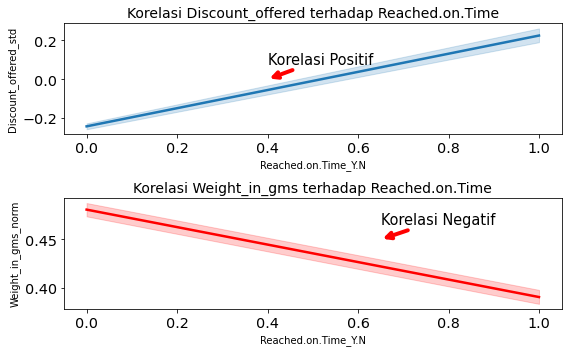

In [61]:
plt.figure(figsize=(12,4))
fig, axes = plt.subplots(2, 1,
                     figsize=(8, 5))

axes[0].set_title('Korelasi Discount_offered terhadap Reached.on.Time', fontsize = 14)
axes[1].set_title('Korelasi Weight_in_gms terhadap Reached.on.Time', fontsize = 14)

sns.lineplot(reached, discount2, ax=axes[0])
sns.lineplot(reached, weight, ax = axes[1], color = 'red')

plt.tight_layout()

axes[0].annotate('Korelasi Positif', xy=(0.4,0.0), xytext=(0.4,0.1), fontsize=14.5,
             arrowprops=dict(
                             ec='red', 
                             arrowstyle='->',  
                             lw=4), va='center')

axes[1].annotate('Korelasi Negatif', xy=(0.65,0.45), xytext=(0.65,0.47), fontsize=14.5,
             arrowprops=dict(
                             ec='red', 
                             arrowstyle='->',  
                             lw=4), va='center')

- korelasi positif antara 'Discount_offered' dan 'Reached.on.Time' yang berarti adalah semakin besar Discount yang diberikan pada suatu produk akan menyebabkan pengiriman semakin terlambat. 
  - Hal tersebut kemungkinan disebabkan karena, tingkat satisfaction konsumen mengalami peningkatan setelah diberikan discount (penurunan harga), untuk dapat mempertahankan tingkat harga tersebut, perusahaan cenderung mengarahkan pengiriman barang kepada opsi yang lebih murah, sehingga menyebabkan meningkatnya kemungkinan terlambat.
  - Kemungkinan selanjutnya yang bisa saja terjadi adalah, di beberapa lokasi yang memiliki sensitifitas harga cukup tinggi. Ketika mendapatkan penurunan harga (discount) tingkat satisfaction konsumen akan meningkat dan menjadi tidak sensitif terhadap faktor-faktor negatif yang mempengaruhi setelah nya, hal tersebut membuat perusahaan akan memprioritaskan pengiriman barang yang tidak mendapatkan diskon terlebih dahulu untuk segera dikirim agar dapat mempertahankan customer satisfaction konsumen non-discount.

- 'Weight_in_gms' memiliki korelasi negatif terhadap target, yang berarti semakin besar berat dari sebuah produk maka akan meningkatkan kecenderungan semakin tepat waktu barang tersebut dikirim.

  - hal tersebut dapat terjadi kemungkinan dikarenakan oleh adanya Dimentional Weight, yang berarti sebuah transportasi ekspedisi memiliki batas minimum isi (dimensi maupun berat) yang harus dipenuhi untuk dapat melakukan perjalanan agar biaya-biaya perjalanan dapat tercover dengan baik. semakin besar atau berat product yang akan dikirim, maka akan semakin cepat batas minimum tersebut terpenuhi, yang akan berdampak pada semakin cepat moda transportasi ekspedisi memulai perjalanan. sebaliknya, semakin kecil dan ringan suatu produk, maka pihak ekspedisi akan semakin membutuhkan lebih banyak waktu untuk memenuhi tingkat batas minimum, yang menyebabkan adanya kemungkinan produk terkirim tidak tepat waktu.

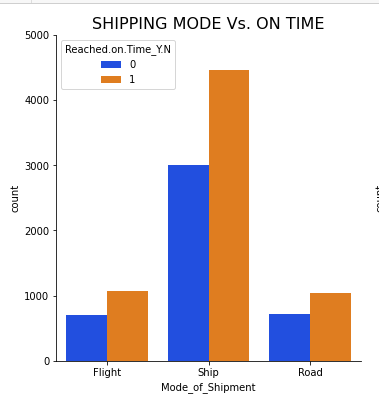

- Shipment mode yang paling banyak digunakan dan paling sering terlambat adalah dengan kapal.
  - Penggunaan kapal sebagai moda transportasi untuk pengiriman merupakan salah satu alternatif bagi barang yang relatif berat dengan jarak tempuh yang jauh. Penggunaan moda transportasi ini bukan tanpa kekurangan, beberapa jalur pelayaran yang dapat memangkas waktu seperti kanal dapat sewaktu-waktu mengalami kemacetan sehingga dapat menghambat proses kedatangan barang


